This program uses an artificial recurment neural network called Long short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.)Using the past 60 day Stock price.


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense ,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
#get the stock quote
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.228699
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.400017
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.316193


In [ ]:
#Get the number of rows and columns
df.shape


(2003, 6)

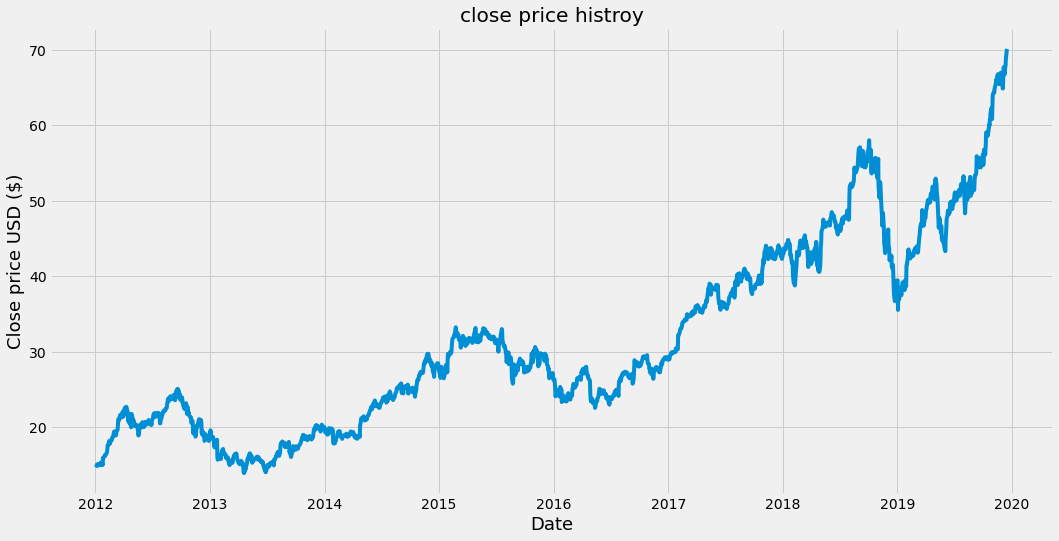

In [ ]:
#visualize the closing price
plt.figure(figsize=(16,8))
plt.title('close price histroy')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [ ]:
#create new data frame with only close column
data = df.filter(['Close'])
#convert the data frame to numpy array
dataset = data.values
#get the number of rows to trian the model on taking 80%
training_data_len = math.ceil(len(dataset)*.8)
training_data_len 

1603

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
#create training data set
#create the scaled trainig data set
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [ ]:
#conver the x_train and y_train to numpy arrays
x_train ,y_train = np.array(x_train),np.array(y_train)
y_train

array([0.13949272, 0.13293563, 0.14507041, ..., 0.58926183, 0.58164901,
       0.58939538])

In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [ ]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')


NameError: ignored

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 31s 20ms/step - loss: 8.0231e-04


In [ ]:
#create the testing data set
#create a new array containing scaled values from index 1543 to  20003
test_data=scaled_data[training_data_len-60: ,:]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)


In [ ]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) 

In [ ]:
#get the group mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.437333345413208

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


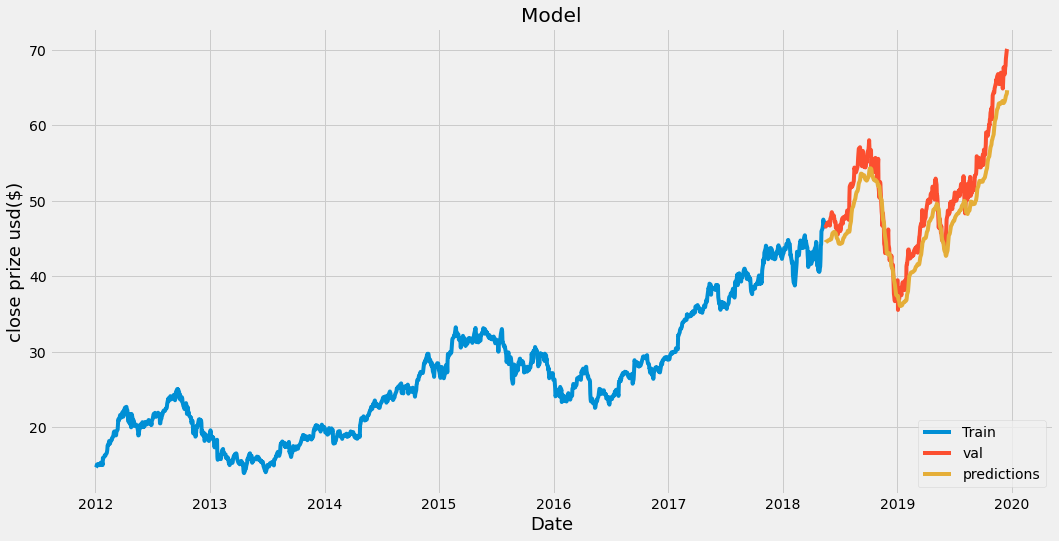

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["predictions"] = predictions

#visuliazie the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close prize usd($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()


In [ ]:
#show the valid price and the predicted prices
valid

,Close,predictions
Date,,
2018-05-17,46.747501,44.508156
2018-05-18,46.577499,44.578739
2018-05-21,46.907501,44.592976
2018-05-22,46.790001,44.619549
2018-05-23,47.090000,44.636383
...,...,...
2019-12-11,67.692497,63.451061
2019-12-12,67.864998,63.663319
2019-12-13,68.787498,63.886345


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[65.08772]]


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
